In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys
from pathlib import Path
import PIL
import os
from time import gmtime, strftime

In [6]:
def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(img))
def show_plt(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [7]:
im_dir = "data/East 4 original location/"
start_frame = 0
frames_count = 180
read_range=(start_frame,start_frame+frames_count) # 24h 4min per frame


In [8]:
img = cv2.imread(im_dir+'frame0.jpg')
print(img.shape)


(1080, 1920, 3)


In [9]:
pixel_pos = (810,480)
the_pixel = img[pixel_pos[0],pixel_pos[1],:]
lum_changes = np.zeros(read_range[1]-read_range[0])
for i in range(read_range[0],read_range[1]):
        img = cv2.imread(im_dir+'frame'+str(i)+'.jpg')
        the_pixel = img[pixel_pos[0],pixel_pos[1],:]
        pixel_lum = np.max(the_pixel)
        lum_changes[i] = pixel_lum
        

In [11]:
avg_pd = pd.DataFrame(lum_changes)
avg_pd.to_csv("sheets/light_changes (810,480) 12h.csv")

In [12]:
time_series = pd.date_range('8:00', freq='4min', periods=frames_count)
print(time_series)

DatetimeIndex(['2020-09-23 08:00:00', '2020-09-23 08:04:00',
               '2020-09-23 08:08:00', '2020-09-23 08:12:00',
               '2020-09-23 08:16:00', '2020-09-23 08:20:00',
               '2020-09-23 08:24:00', '2020-09-23 08:28:00',
               '2020-09-23 08:32:00', '2020-09-23 08:36:00',
               ...
               '2020-09-23 19:20:00', '2020-09-23 19:24:00',
               '2020-09-23 19:28:00', '2020-09-23 19:32:00',
               '2020-09-23 19:36:00', '2020-09-23 19:40:00',
               '2020-09-23 19:44:00', '2020-09-23 19:48:00',
               '2020-09-23 19:52:00', '2020-09-23 19:56:00'],
              dtype='datetime64[ns]', length=180, freq='4T')


In [13]:
strtime_series = time_series.strftime('%H:%M')
print(strtime_series)

Index(['08:00', '08:04', '08:08', '08:12', '08:16', '08:20', '08:24', '08:28',
       '08:32', '08:36',
       ...
       '19:20', '19:24', '19:28', '19:32', '19:36', '19:40', '19:44', '19:48',
       '19:52', '19:56'],
      dtype='object', length=180)


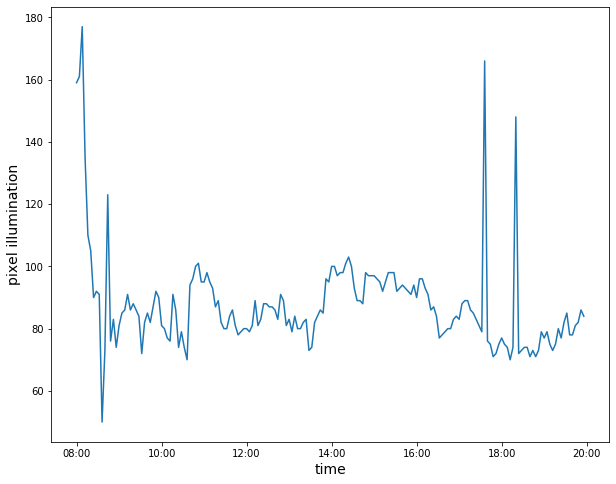

In [14]:
from matplotlib.dates import DateFormatter
myFmt = DateFormatter('%H:%M')

fig, ax = plt.subplots(figsize=(10.0, 8.0))
ax.xaxis.set_major_formatter(myFmt)
ax.plot(time_series,lum_changes)
plt.xlabel("time", fontsize=14)
plt.ylabel("pixel illumination", fontsize=14)
plt.show()

In [16]:
fig.savefig("flow_results/light_changes/(810,480) 12h LIME.jpg")

In [17]:
# Sand Box
def avg_lum(img):
    lum_sum = 0
    h = img.shape[0]
    w = img.shape[1]
    for i in range(h):
        for j in range(w):
            lum_sum += np.max(img[i,j,:])
    return lum_sum, lum_sum/(w*h)
def f1(row):
    return 0
def avg_lum2(img):
    return np.array(map())
a = np.apply_over_axes(np.max, img, [2])
a = a.reshape((1080,1920))

In [18]:
avg_lum_changes = np.zeros(read_range[1]-read_range[0])
for i in range(read_range[0],read_range[1]):
        sys.stdout.write("\r%f%%" % ((i+1-read_range[0])*100/(read_range[1] - read_range[0])))
        sys.stdout.flush()
        img = cv2.imread(im_dir+'frame'+str(i)+'.jpg')
        a = np.apply_over_axes(np.max, img, [2])
        a = a.reshape((1080,1920))
        avg_lum_changes[i] = np.average(a)

100.000000%

In [20]:
avg_pd = pd.DataFrame(avg_lum_changes)
avg_pd.to_csv("sheets/light_changes average 12h.csv")

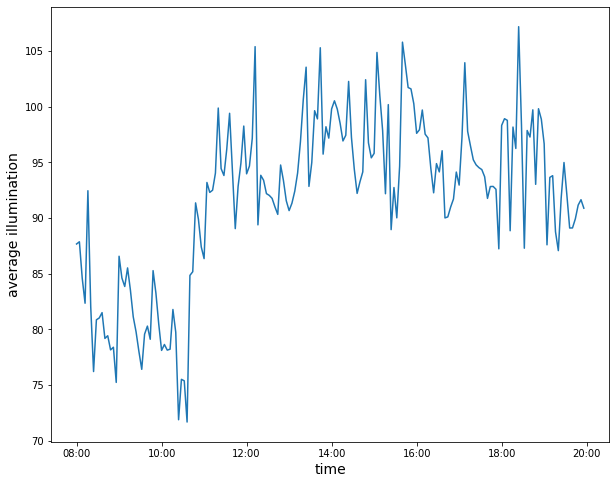

In [21]:
from matplotlib.dates import DateFormatter
myFmt = DateFormatter('%H:%M')

fig, ax = plt.subplots(figsize=(10.0, 8.0))
ax.xaxis.set_major_formatter(myFmt)
ax.plot(time_series,avg_lum_changes)
plt.xlabel("time", fontsize=14)
plt.ylabel("average illumination", fontsize=14)
plt.show()

In [22]:
fig.savefig("flow_results/light_changes/average 12h LIME.jpg")

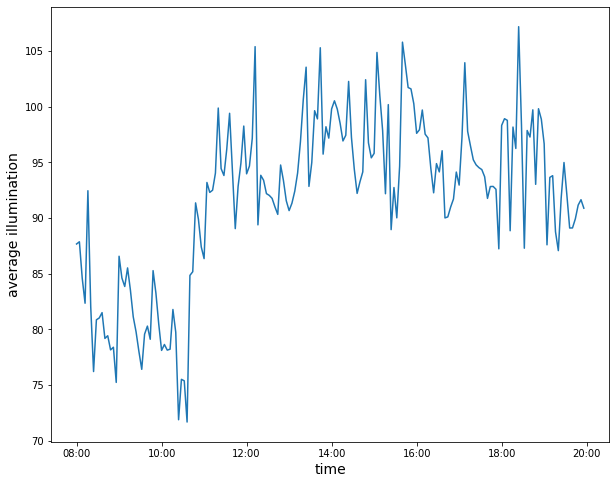

In [23]:
fig, ax = plt.subplots(figsize=(10.0, 8.0))
ax.xaxis.set_major_formatter(myFmt)
ax.plot(time_series,avg_lum_changes)
plt.xlabel("time", fontsize=14)
plt.ylabel("average illumination", fontsize=14)
plt.show()

In [25]:
df_lime = pd.read_csv("sheets/light_changes average 12h LIME.csv")
df_lime = df_lime.iloc[:,1]
df_normal = pd.read_csv("sheets/light_changes average 12h.csv")
df_normal = df_normal.iloc[:,1]
fig, ax = plt.subplots(figsize=(10.0, 8.0))

ax.plot(time_series,df_lime, label='after LIME')
plt.xlabel("time", fontsize=14)
plt.ylabel("average illumination", fontsize=14)
ax.plot(time_series,df_normal, label='original')
ax.legend(loc='upper left')
plt.show()

FileNotFoundError: [Errno 2] File sheets/light_changes average 12h LIME.csv does not exist: 'sheets/light_changes average 12h LIME.csv'

In [5]:
fig.savefig("flow_results/light_changes/average 12h LIME&org.jpg")

NameError: name 'fig' is not defined

# HEATMAP

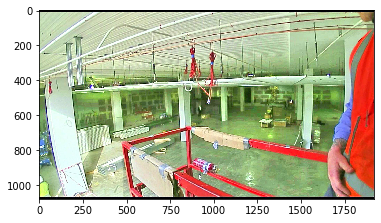

In [65]:
im_dir = "data/East 4 original location LIME/"
img = cv2.imread(im_dir+'frame0.jpg')
show_plt(img)

[[  0   0   0 ... 249 248 248]
 [  0   0   0 ... 249 249 249]
 [  0   0   0 ... 252 252 252]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


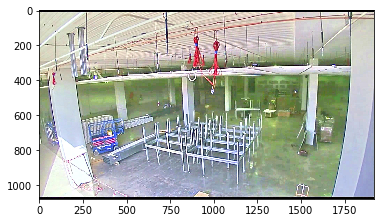

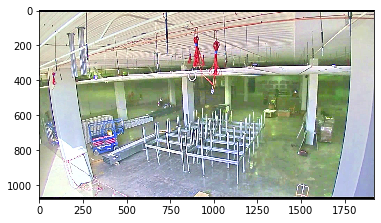

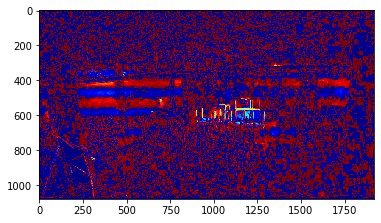

True

In [66]:
img = cv2.imread(im_dir+'frame30.jpg')
img2 = cv2.imread(im_dir+'frame31.jpg')
avg_lum = [0,0]
a = np.apply_over_axes(np.max, img, [2])
a = a.reshape((1080,1920))
avg_lum[0] = np.average(a)
b = np.apply_over_axes(np.max, img2, [2])
b = b.reshape((1080,1920))
avg_lum[1] = np.average(b)
img3 = np.abs(b - a)
print(img3)
img4 = cv2.applyColorMap(img3, cv2.COLORMAP_JET) #test
show_plt(img)
show_plt(img2)
show_plt(img4)
avgdiff = avg_lum[1] - avg_lum[0]
cv2.imwrite('flow_results/HeatMap/f30-f31 avgdiff:'+str(avgdiff)+'.jpg',img4)

In [20]:
def get_heatmap(im_dir, read_range):
    heatMap = None
    for i in range(read_range[0],read_range[1]):
        img = cv2.imread(im_dir+'frame'+str(i)+'.jpg')
        a = np.apply_over_axes(np.max, img, [2])
        a = a.reshape((1080,1920))
        a = a.astype('float32')
        if i == read_range[0]:
            pass
            #heatMap = a
        else:
            if heatMap is None:
                heatMap = np.abs(preImg - a)
            else:
                heatMap += np.abs(preImg - a)
        
        preImg = a
    return heatMap

In [21]:
heatMap = None
preImg = None
read_range = (700,710)
im_dir = "data/East 4 original location/"
im_dir_lime = "data/East 4 original location LIME/"



In [22]:
org_heatmap = get_heatmap(im_dir, read_range)
lime_heatmap = get_heatmap(im_dir_lime, read_range)

In [23]:
print(org_heatmap.shape)
High = np.max(org_heatmap)
Low = np.min(org_heatmap)
print(High, Low)
#filt = 6500
#print(np.sum(heatMap > filt))
#heatMapFiltered = heatMap.copy()
#heatMapFiltered[heatMap > filt] = filt

(1080, 1920)
598.0 0.0


In [24]:
org_heatMapf = org_heatmap.astype('float32')
org_heatMapf *= 255.0/org_heatmap.max()

lime_heatMapf = lime_heatmap.astype('float32')
lime_heatMapf *= 255.0/lime_heatmap.max()

lime_heatMapf.max()

255.0

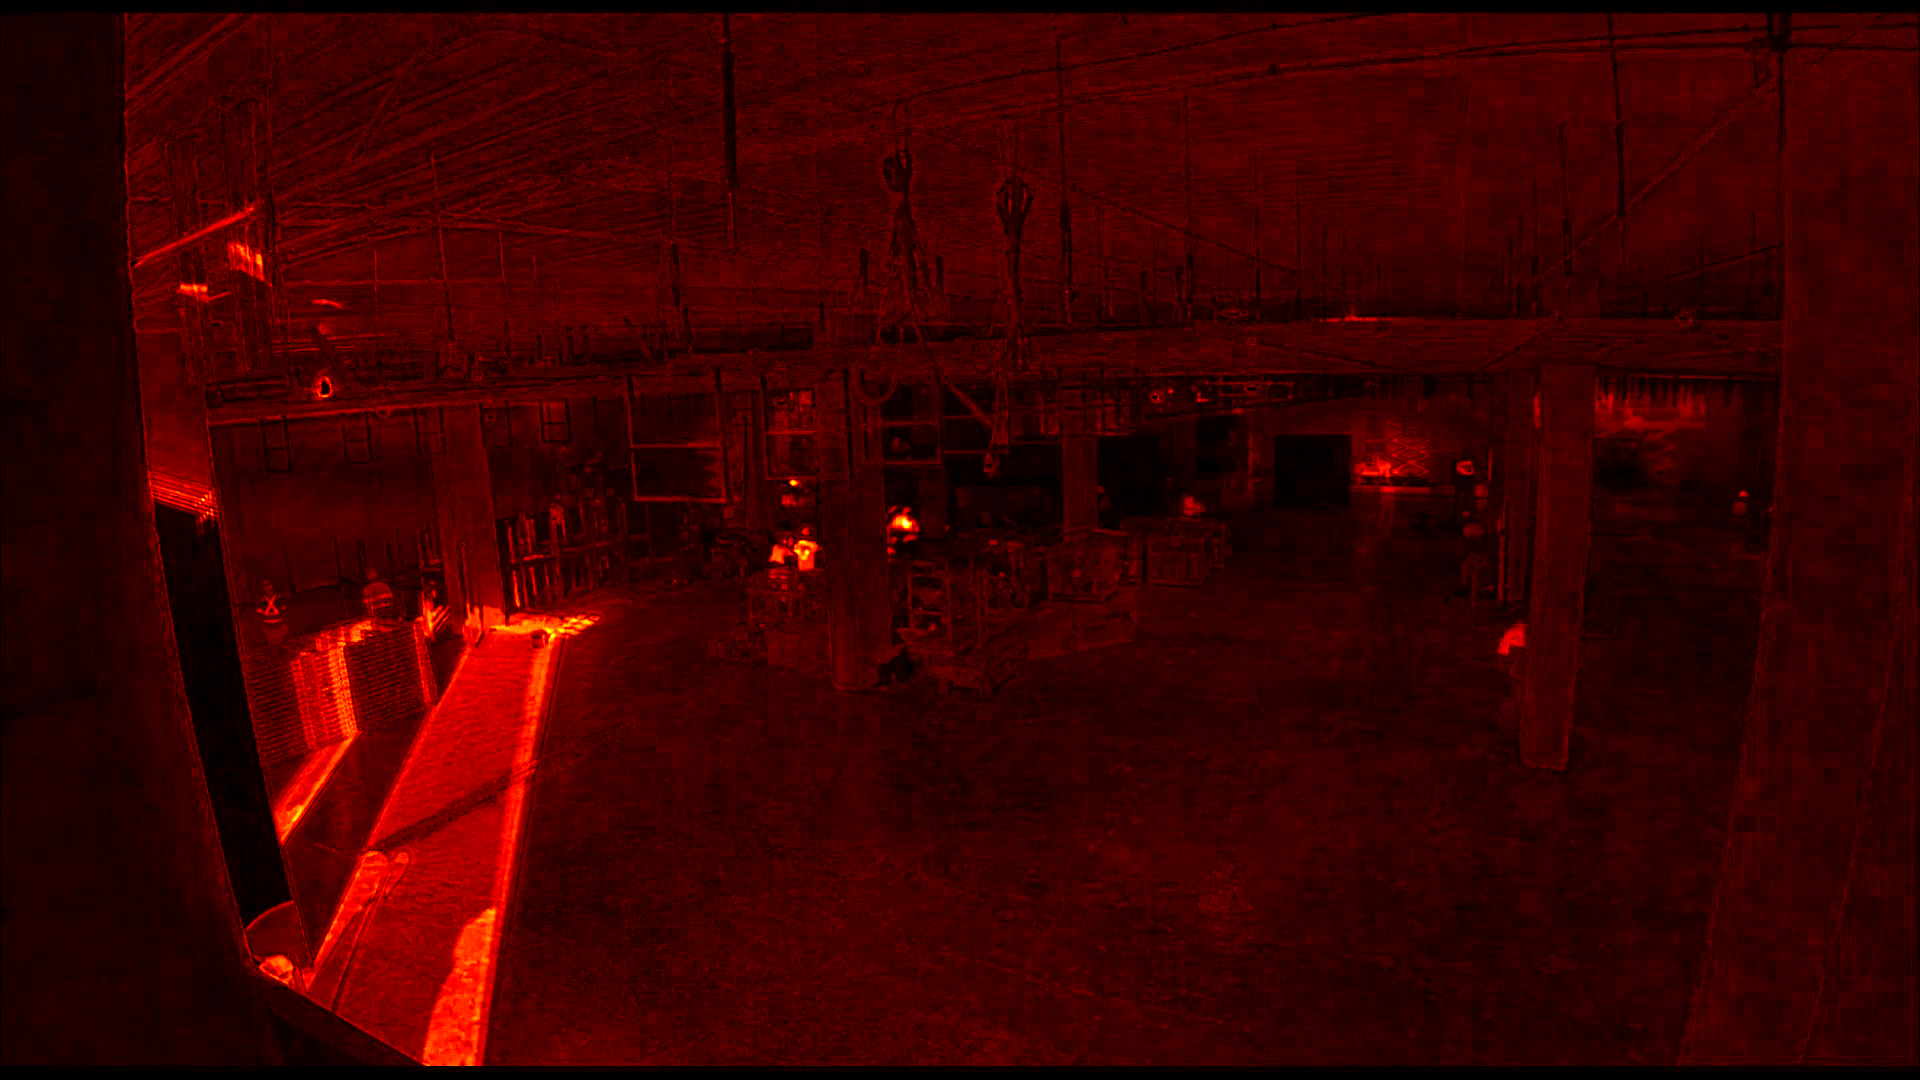

In [27]:
org_heatMapGray = org_heatMapf.astype('uint8')
lime_heatMapGray = lime_heatMapf.astype('uint8')

org_heatMapRGB = cv2.applyColorMap(org_heatMapGray, cv2.COLORMAP_HOT)
lime_heatMapRGB = cv2.applyColorMap(lime_heatMapGray, cv2.COLORMAP_HOT)

show(org_heatMapRGB)

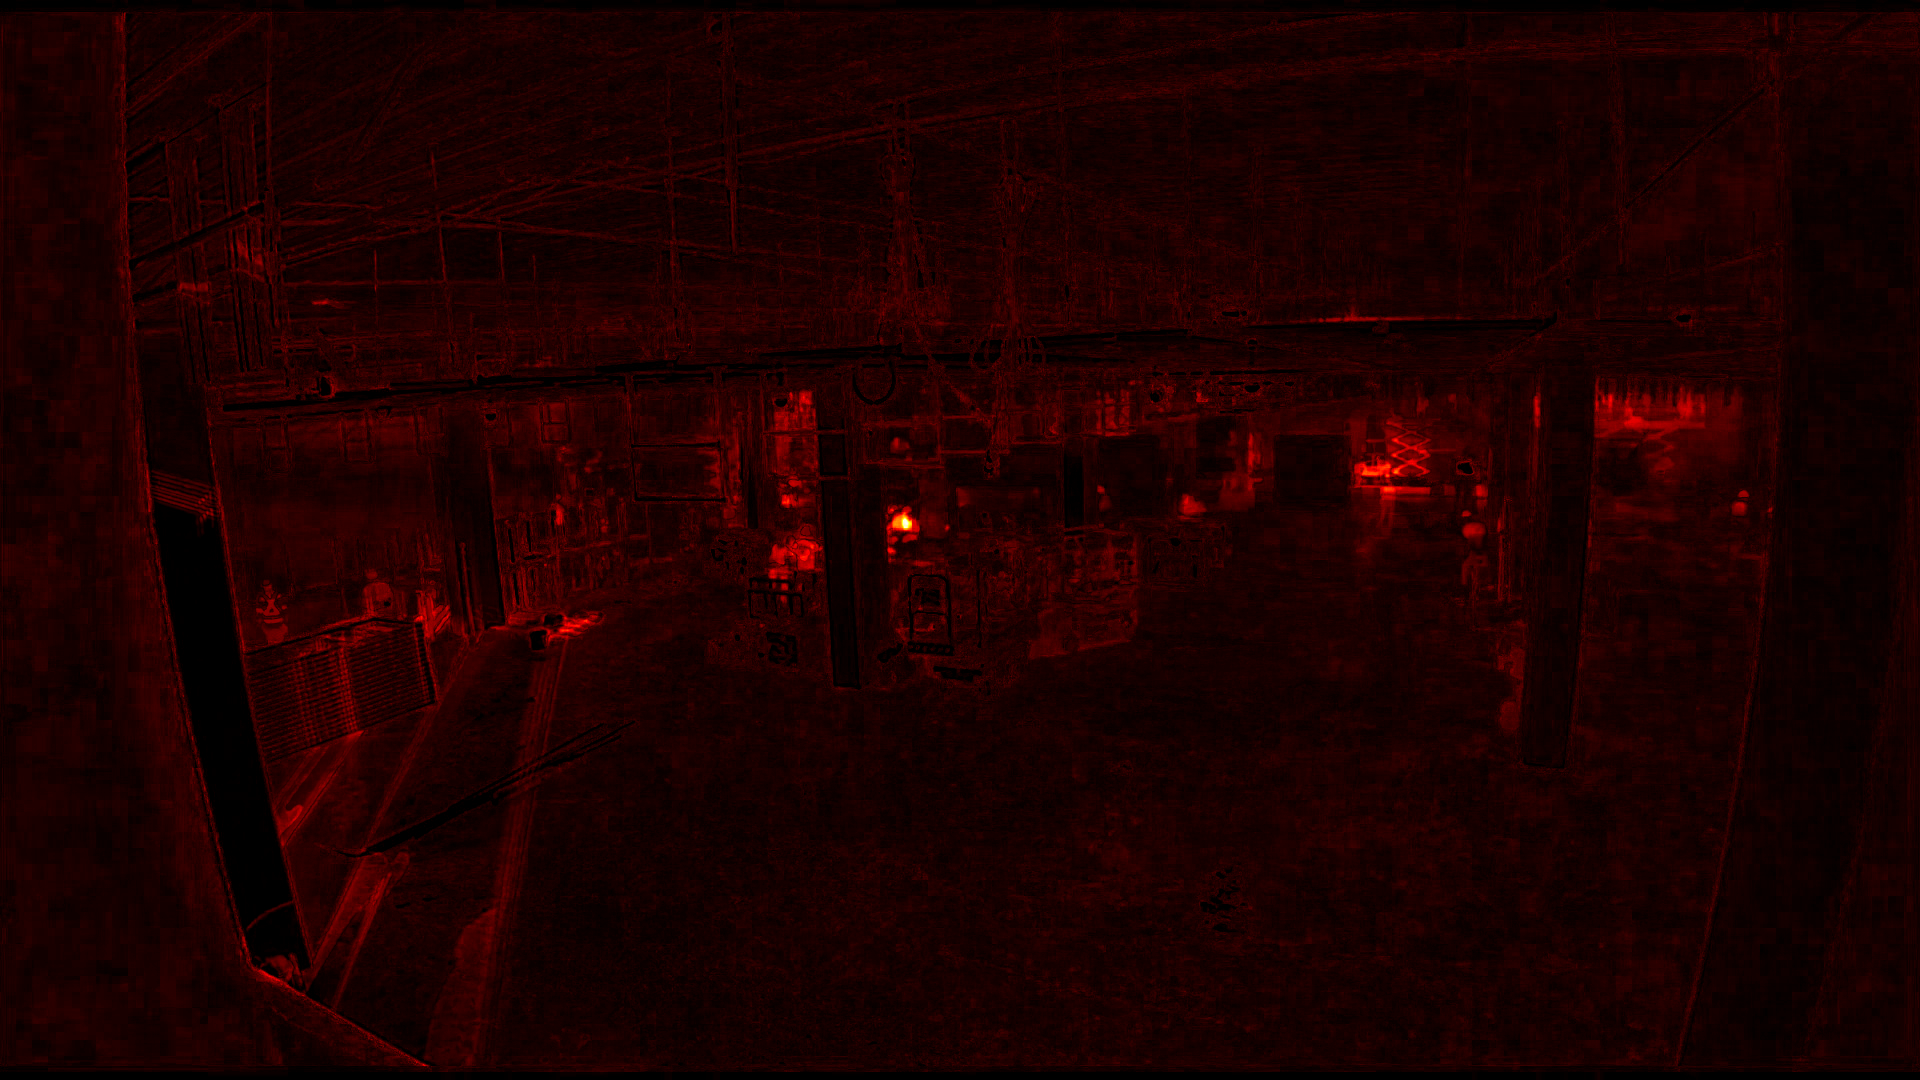

In [28]:
show(lime_heatMapRGB)

In [12]:
cv2.imwrite('flow_results/HeatMap/700-710 HOT.jpg',heatMapRGB)

True